In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('lapTimes.csv')
df_coin = pd.read_csv('CryptocoinsHistoricalPrices.csv')

In [3]:
df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [4]:
dfbtc = df_coin[(df_coin['coin']=='BTC') & (df_coin['High'] < 4000) & (df_coin['Low'] < 4000)]
dfbtc.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
105,106,2017-09-26,3928.41,3969.89,3869.90,3892.35,"1,043,740,000","65,161,000,000",BTC,-0.009179
106,107,2017-09-25,3681.58,3950.25,3681.58,3926.07,"1,374,210,000","61,061,100,000",BTC,0.066409
107,108,2017-09-24,3796.15,3796.15,3666.90,3682.84,"768,015,000","62,954,300,000",BTC,-0.029849
108,109,2017-09-23,3629.92,3819.21,3594.58,3792.40,"928,114,000","60,190,000,000",BTC,0.044761
109,110,2017-09-22,3628.02,3758.27,3553.53,3630.70,"1,194,830,000","60,152,300,000",BTC,0.000739


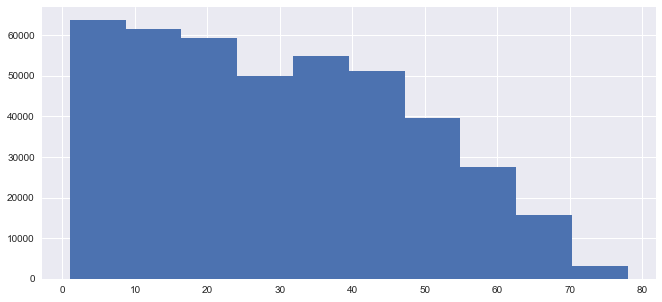

In [5]:
plt.figure(figsize=(11, 5))
plt.hist(df['lap'])
plt.show()

Pros: Offers a good general overview with some detail
Cons: Bins are not detailed enough to form conclusions on specific points

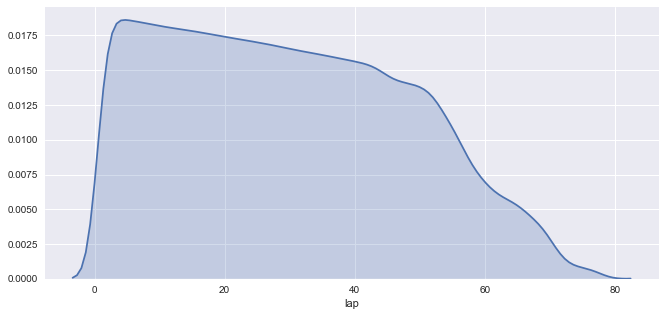

In [6]:
plt.figure(figsize=(11, 5))
sns.distplot(df['lap'], hist=False, kde_kws={"shade": True})
plt.show()

Pros: Gives you a good read on the distribution of the data
Cons: Offers very little detail

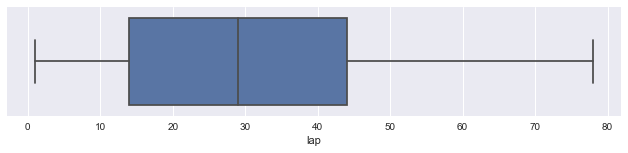

In [7]:
plt.figure(figsize=(11, 2))
sns.boxplot(df['lap']) 
plt.show()

Pros: One of the strongest plots, offers good overview of all the data. Easy to read distribution.
Cons: Could be viewed as complicated for people not familiar with boxplots

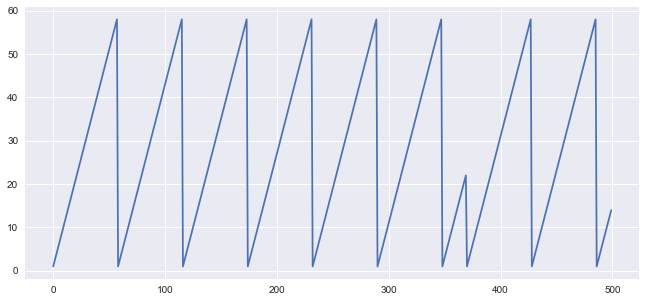

In [8]:
plt.figure(figsize=(11, 5))
plt.plot(df.iloc[:500]['lap'])
plt.show()

Pros: Good for evaulating how a variable changes over time.
Cons: Does not handle a lot of data points well. 

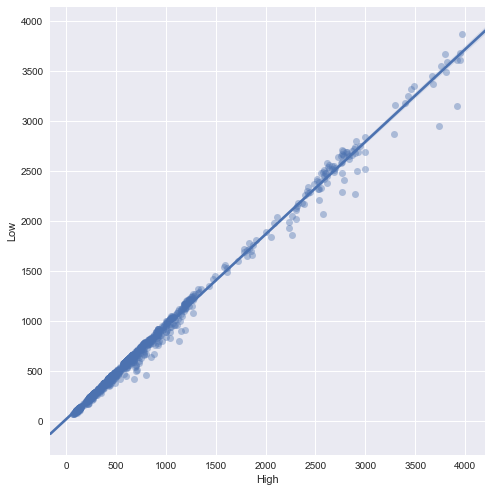

In [9]:
sns.lmplot(x='High', y='Low', data=dfbtc, scatter_kws={'alpha':0.4}, size=7)
plt.show()

Pros: Good for seeing the correlation between two variables. Positive linear correlation here.
Cons: Data that overlaps is not handled well

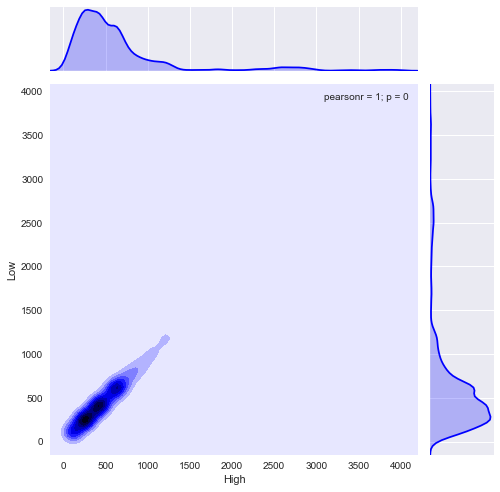

In [10]:
sns.jointplot(x='High', y='Low', data=dfbtc, kind="kde",color='b', size = 7);

Pros: The KDE plot gives a good idea of how the data is distributed. Handles a lot of data well
Cons: Does not show individual data points well

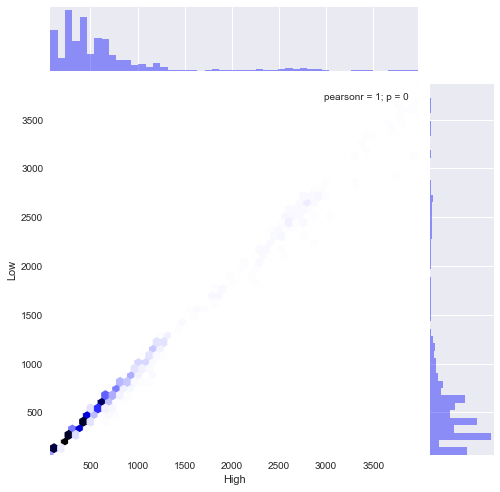

In [11]:
sns.jointplot(x='High', y='Low', data=dfbtc, kind="hex",color='b', size = 7);

Pros: Good for data with a lot of overlap, while still keeping data accuracy.
Cons: Not a great visual representation in most cases.

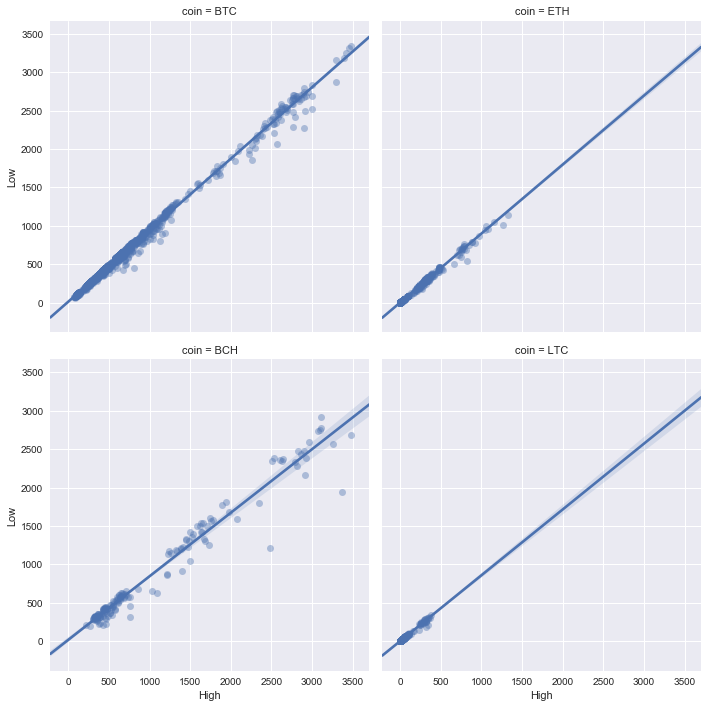

In [12]:
newdf = df_coin[((df_coin['coin']=='BTC') | (df_coin['coin']=='ETH') | (df_coin['coin']=='LTC') | (df_coin['coin']=='BCH')) & (df_coin['High'] < 3500) & (df_coin['Low'] < 4000)]
sns.lmplot(x='High', y='Low', col='coin',col_wrap=2, data=newdf, size = 5, scatter_kws={'alpha':0.4});

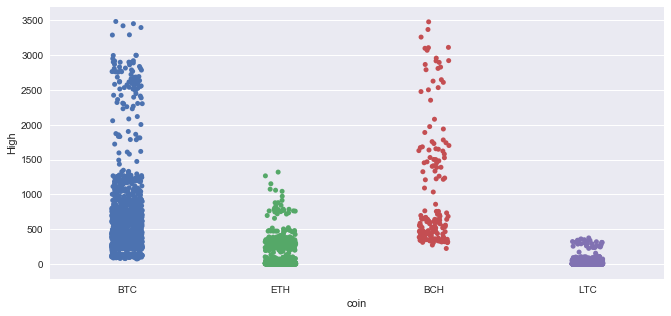

In [13]:
plt.figure(figsize=(11, 5))
sns.stripplot(x="coin", y="High", data=newdf, jitter=True);

Pros: Shows each individual data point
Cons: Data overlap, Random jitter that doesn't represent data

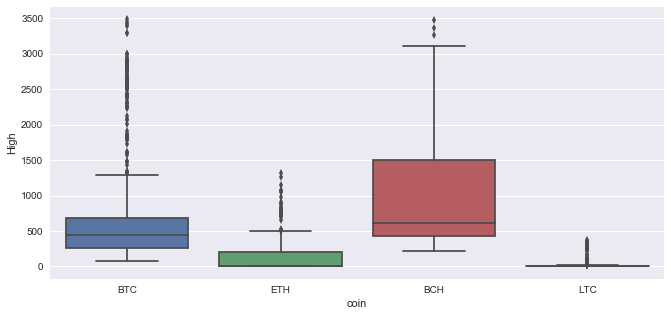

In [14]:
plt.figure(figsize=(11, 5))
sns.boxplot(x="coin", y="High", data=newdf);

Pros: Great for comparing two classifactions of data.
Cons: Does not plot individual data points

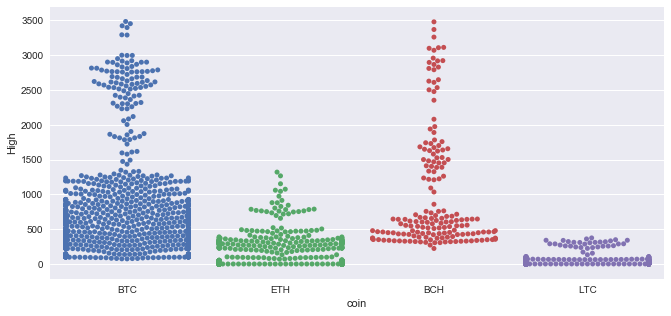

In [15]:
plt.figure(figsize=(11, 5))
sns.swarmplot(x="coin", y="High", data=newdf);

Pros: Plots each individual data point, Very detailed
Cons: Takes a long time to render, not good to use in a workflow. If there are too many data points it still has data overlap

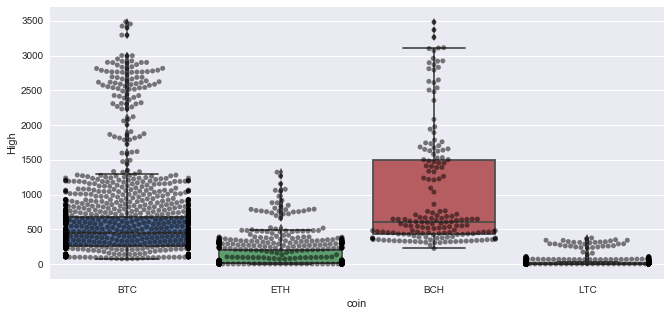

In [33]:
plt.figure(figsize=(11, 5))
sns.boxplot(x="coin", y="High", data=newdf)
sns.swarmplot(x="coin", y="High", data=newdf, color="k", alpha=.5);

Pros: This plot combines our boxplot and swarmplot to get the best of both worlds
Cons: Takes a long time to render.

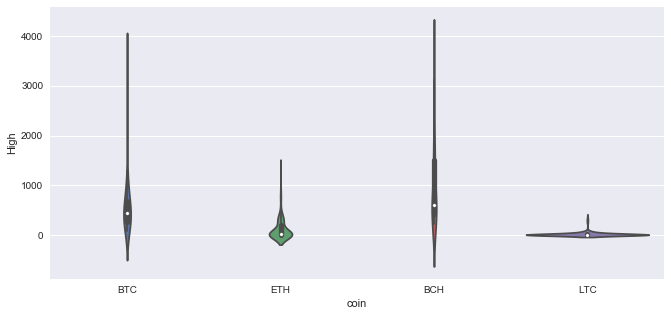

In [28]:
plt.figure(figsize=(11, 5))
sns.violinplot(x="coin", y="High", data=newdf, bw=.5);

Pros: The violin plots are very similar to box plots with a bit more detail showing exactly where the data lies
Cons: Not as straight forward as a boxplot. 

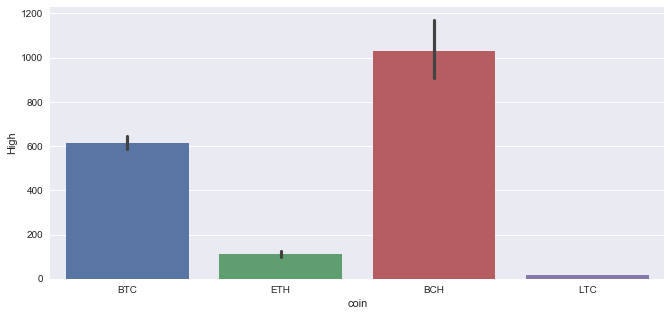

In [17]:
plt.figure(figsize=(11, 5))
sns.barplot(x="coin", y="High", data=newdf);

Pros: Easy to read, in some cases great for comparison
Cons: Bars should start at zero which can be an issue